#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# 1-Basic Data Exploration:

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load your dataset
df = pd.read_csv('/content/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN





* the number of rows and columns in the dataset:





In [6]:
print('data shape:\n',df.shape)

data shape:
 (148654, 13)



* the data types of each column:


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB




* checking for missing values in each column:



In [8]:
print(df.isnull().sum())

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


# 2-Descriptive Statistics:



* Calculating basic statistics mean, median, mode, minimum, maximum salary, the range of salaries, and the standard deviation:



In [9]:
print(df['TotalPay'].describe())

count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64


# Data Cleaning



* Handling missing data by suitable method:

> since both 'Notes' and 'Status' colums are completely null then I will remove them.





In [21]:
df=df.drop(['Status', 'Notes'], axis=1)
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco




> since the number of null values of both 'Benefits' and 'BasePay' columns are small comparing to the full number of rows then I will replace it with mean values.



In [32]:
#after data cleaning
df['Benefits'].fillna(df['Benefits'].mean(), inplace=True)
df['BasePay'].fillna(df['BasePay'].mean(), inplace=True)
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,25007.893151,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,25007.893151,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,25007.893151,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,25007.893151,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,25007.893151,326373.19,326373.19,2011,San Francisco


#4-Basic Data Visualization:


* visualizing the distribution of salaries using histogram:



<Axes: >

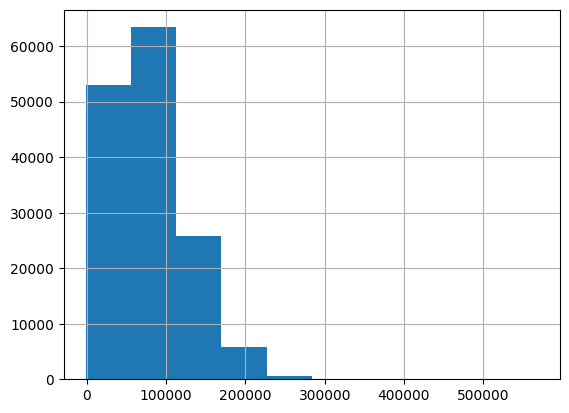

In [33]:
df['TotalPay'].hist()



> representing the proportion of employees in different departments using pie charts:



Transit Operator                                  7036
Special Nurse                                     4389
Registered Nurse                                  3736
Public Svc Aide-Public Works                      2518
Police Officer 3                                  2421
                                                  ... 
CHIEF HOUSING INSPECTOR                              1
TRAFFIC SIGNAL OPERATOR                              1
COURT COMPUTER FACILITIES COORDINATOR                1
AUTOMOTIVE BODY AND FENDER WORKER SUPERVISOR I       1
VICTIM & WITNESS TECHNICIAN                          1
Name: JobTitle, Length: 2159, dtype: int64
the top 10 departments:
 Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Custodian                       2418
TRANSIT OPERATOR                2388
Firefighter                     2359
Recreation Leader              

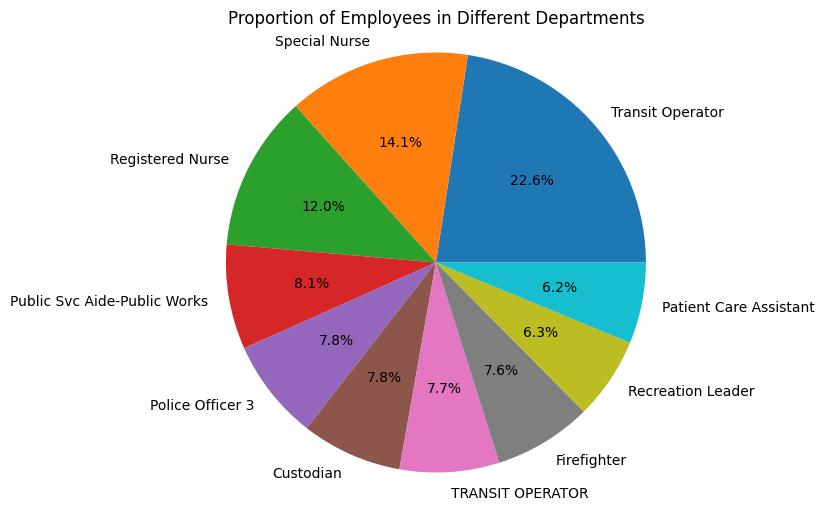

In [28]:
department_counts = df['JobTitle'].value_counts()
print(department_counts)

# Select the top 10 departments
top_n = 10
department_counts = department_counts.head(top_n)
print( 'the top 10 departments:\n', department_counts)
# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Employees in Different Departments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# 5- Grouped Analysis:


* Grouping the data by one or more columns, calculating summary statistics for each group, and comparing the average salaries across different groups:



                                                count          mean  \
JobTitle                                                              
ACCOUNT CLERK                                    83.0  44035.664337   
ACCOUNTANT                                        5.0  47429.268000   
ACCOUNTANT INTERN                                48.0  29031.742917   
ACPO,JuvP, Juv Prob (SFERS)                       1.0  62290.780000   
ACUPUNCTURIST                                     1.0  67594.400000   
...                                               ...           ...   
X-RAY LABORATORY AIDE                            26.0  52705.880385   
X-Ray Laboratory Aide                           100.0  50823.942700   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    1.0  53632.870000   
Youth Comm Advisor                                4.0  41414.307500   
ZOO CURATOR                                       1.0  66686.560000   

                                                         std       min  \
Jo

Text(0, 0.5, 'JobTitle')

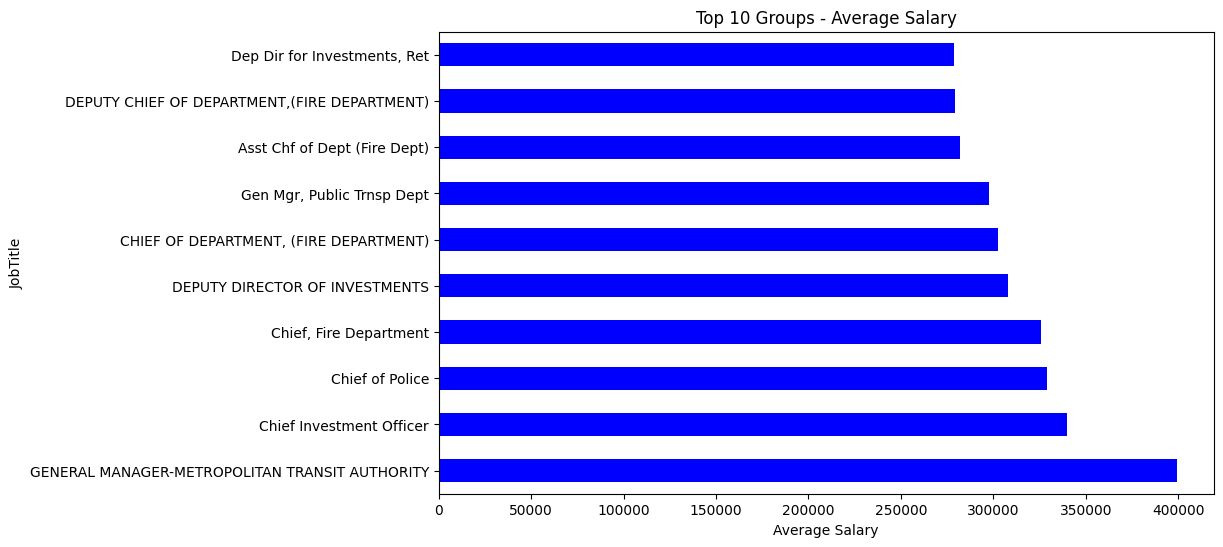

In [29]:
# Group the data by the 'JobTitle' column
grouped_data = df.groupby(['JobTitle'])

# Calculate summary statistics for each group based on salary
grouped_stats = grouped_data['TotalPay'].describe()
print(grouped_stats)

# Calculate the average salary for each group
grouped_salaries = grouped_data['TotalPay'].mean()

# Select the top 10 groups based on average salary
top_groups = grouped_salaries.nlargest(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_groups.plot(kind='barh', color='blue')
plt.title('Top 10 Groups - Average Salary'.format(10))
plt.xlabel('Average Salary')
plt.ylabel('JobTitle')

# 6- Simple Correlation Analysis:


* Identifying any correlation between salary and another numerical column, and plotting a scatter plot to visualize the relationship:



Text(0.8, 0.9, 'Correlation: 0.03')

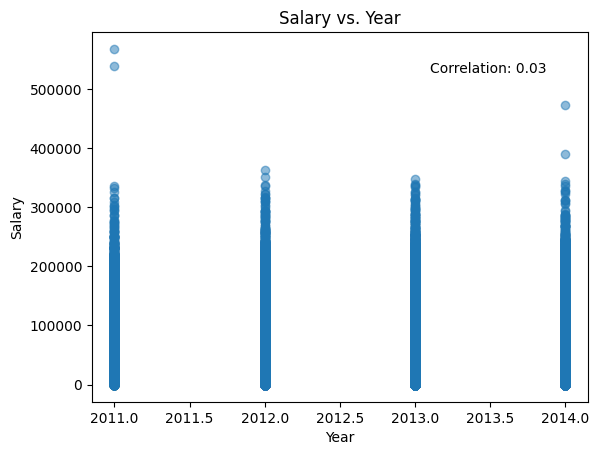

In [30]:
# Calculate the correlation coefficient between the two columns 'TotalPay' and 'Year'
correlation_coefficient = df['TotalPay'].corr(df['Year'])

# Create a scatter plot to visualize the relationship
plt.scatter(df['Year'], df['TotalPay'], alpha=0.5)
plt.title('Salary vs. ' + 'Year')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.text(0.8, 0.9, f'Correlation: {correlation_coefficient:.2f}', ha='center', va='center', transform=plt.gca().transAxes)


> From the scatter plot, I can conclude that there is a positive correlation between salary and year. This means that salaries generally tend to increase over time.


> This correlation can be explained in several ways. One possibility is that companies pay higher salaries to experienced employees. This is because they believe that these employees are more productive and contribute more to the company.



> Another possibility is that inflation causes salaries to increase over time. This is because it causes the cost of living to rise, which means that companies need to pay more to employees to maintain the same standard of living.




> The correlation could also be the result of other factors, such as changes in the economy or laws that affect the labor market.



> In general, the positive correlation between salary and year indicates that salaries generally tend to increase over time. However, it is important to note that this correlation is not necessarily accurate for everyone. Salaries may vary from person to person.


---



























# 7- Summary of Insights:
1. When reviewing the dataset, it was found that there are two columns, 'Status' and 'Notes', with all values being null. Therefore, these columns were removed.

2. It was also noticed that the 'Benefits' and 'BasePay' columns contain null values, but the number of null values is relatively small compared to the total number of records. Therefore, they were replaced with the respective column's mean values in order.

3. When examining the histogram of the salary column, it was observed that the most common salary is 100,000, with over 60,000 employees. As the salary range increases, there is a steady decline in the number of employees, with only a few earning more than $200,000.

4. The pie chart representing the proportion of employees in different departments shows that the most common job title in the organization is Registered Transit Operator, accounting for over (22%) of the employees. This is followed by Special Nurse (14.1%), Registered Nurse (12.0%), and Public Svc Aide-Public Works (8.1%).

5. After grouping the data by the 'jobTitle' column and calculating the average salary for the top 10 most common jobs, it is evident that the highest-paying job in the organization is General Manager-Metropolitan Transit Authority, with an average salary of 400,000. This is followed by Deputy Director of Investments (over 300,000), Chief of Departement (Fire Department) (300,000), and Deputy Chief of Departement (over 250,000).

6. After Identifying the correlation between salary and year It can be concluded that there is a positive correlation between them, indicating that salaries generally tend to increase over time.


>  
* The correlation between salary and year appears to be particularly strong in recent years.
* There are some data points scattered outside the trend line, suggesting that there are exceptions to this correlation.
* Although it is difficult to determine the exact value of the correlation coefficient from the plot, it appears to be fairly high.


---



